# Data Management and Regression Analysis Assignment

## Introduction

This assignment is going to examine the two datasets one consists of the audit fee information from the Audit Analytics database and another dataset that is "BANA-680 Assignment 4 OL Compustat201019" which contains financial characteristics of firms from the Compustat Annual Industrial file. This assignment report is going to consider the "audit fees (Y)" as the dependent variable  firm characteristics (X) variable like "at"(total assets), "act"(current assets), "lct"(current liabilities), "ebitda"(earnings before interest, taxes, depreciation, and amortization), "ceq"(commomn/ordinary equity), "ebit"(earning before intereest & taxes) , "pifo" (pretax inocme foreign) and "invt"(inventories). This assignmnet will try to analyze the correlation between the independent variables and then also correlation between the dependt (Y) variable i.e. "audit fees" with all indpenedent varible to see which (X) variables are highly correlated with "audit fees" and whether they are positively or negatively correlated. The assignment will try to provide a OLS model of best fit to see how much of the vairance in "audit fees" can be explained by the (x) or independent varibales. 

### Importing All the required Libraries. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

### Importing the data

In [2]:
df = pd.read_csv('C:/Users/Palam/Downloads/BANA-680 Assignment 4 OL AuditFees201019.csv',engine='python',encoding='latin1')
df2 = pd.read_csv('C:/Users/Palam/Downloads/BANA-680 Assignment 4 OL Compustat201019.csv',engine='python',encoding='latin1')


In [3]:
df.head(2)

,FISCAL_YEAR,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,BEST_EDGAR_TICKER
0,2009,02JAN2010,643000,Grant Thornton LLP,20,NaN
1,2010,31MAY2010,1490000,KPMG LLP,1750,AIR


In [4]:
df2.head(2)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
0,1004,20100531,2009.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,746.906,95.415,134.345,5.8,496.904,325.55,NaN,11.0,A,USA
1,1004,20110531,2010.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,835.845,137.016,196.312,6.1,507.274,416.01,NaN,11.0,A,USA


### Understanding the data.

In [5]:
pd.unique(df['FISCAL_YEAR'])
n = len(pd.unique(df['AUDITOR_NAME']))
print(n)

947


In [6]:
print(df['AUDITOR_NAME'].value_counts())

Ernst & Young LLP             16471
PricewaterhouseCoopers LLP    16185
Deloitte & Touche LLP         13683
KPMG LLP                      11985
Grant Thornton LLP             2954
                              ...  
Colabella & Company               1
UltraCPA LLP                      1
Lubbock Fine                      1
LGG & Associates PC               1
Prager Metis CPAs LLP (CA)        1
Name: AUDITOR_NAME, Length: 947, dtype: int64


To examine how many auditing companies are listed within the dataset I used the value counts to count of each of the distinct values of a specific column that is "Auditor Name" , used the pandas value_counts() function.

### Checking for null values in the Audit DF

In [7]:
df['BEST_EDGAR_TICKER'].isnull().values.sum()

48711

In [8]:
df.isna().any()

FISCAL_YEAR          False
FISCAL_YEAR_ENDED    False
AUDIT_FEES           False
AUDITOR_NAME         False
COMPANY_FKEY         False
BEST_EDGAR_TICKER     True
dtype: bool

While looking for any missing or NaN values in the dataframe came to know that there are 48711 missing values but at a initial look into the csv file of the dataset I knew that the only column that had missing values was "BEST_EDGAR_TICKER" but to avoid any error I checked for missing values in the dataframe across all columns and came to conclusion that only "BEST_EDGAR_TICKER" has NaN values.

#### Dropping all rows with Nan values.

In [9]:
df.dropna(how='any',inplace=True)

Checking is Nan values were dropped.

In [10]:
df.isnull().values.sum()
#df['BEST_EDGAR_TICKER'].isnull().values.any()

0

In [11]:
df["AUDIT_FEES"].describe().apply(lambda x: format(x, 'f'))

count        52467.000000
mean       1962355.636991
std        5333468.638927
min              0.000000
25%          81000.000000
50%         455715.000000
75%        1608000.000000
max      144500000.000000
Name: AUDIT_FEES, dtype: object

After conducting the data description for the particular "AUDIT_FEES" column in the dataframe we can see that the mean value of the audit fees charged the the auditor companies is $1,962,355.63. 

#### Checking and removing all the rows with Nan values in df2.

In [12]:
df2.isnull().values.sum()

391267

In [13]:
df2.isna().any()

gvkey       False
datadate    False
fyear        True
indfmt      False
consol      False
popsrc      False
datafmt     False
tic          True
conm        False
curcd        True
act          True
at           True
ceq          True
ebit         True
ebitda       True
emp          True
invt         True
lct          True
pifo         True
exchg        True
costat      False
fic         False
dtype: bool

In [14]:
df2.dropna(how='any',inplace=True)

In [16]:
df.head(2)

,FISCAL_YEAR,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,BEST_EDGAR_TICKER
1,2010,31MAY2010,1490000,KPMG LLP,1750,AIR
2,2011,31MAY2011,1275000,KPMG LLP,1750,AIR


In [17]:
df2.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
5,1004,20150531,2014.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,845.1,-8.6,83.7,4.85,566.7,412.0,11.2,11.0,A,USA
6,1004,20160531,2015.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,865.8,66.1,136.9,4.70,563.7,329.0,13.2,11.0,A,USA
7,1004,20170531,2016.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,914.2,77.2,148.2,4.60,601.1,335.1,19.4,11.0,A,USA
8,1004,20180531,2017.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,936.3,86.0,126.5,5.00,547.9,333.3,18.5,11.0,A,USA
9,1004,20190531,2018.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,905.9,110.7,153.5,5.65,589.0,357.5,20.1,11.0,A,USA


#### Merging the cleaned two dataframes into one

After the cleanning of the df and df2 dataframes by removing all the NaN values the next step was to merge the two dataframes into one based on the fiscal year/ fyear and "BEST_EDGAR_TICKER or tic" columns so that we can use it to conduct the statsictical analysis further.

In [18]:
df3 = pd.merge(df,df2,how='left',left_on=['FISCAL_YEAR','BEST_EDGAR_TICKER'], right_on=['fyear','tic'])
df3.head()

,FISCAL_YEAR,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,BEST_EDGAR_TICKER,gvkey,datadate,fyear,indfmt,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
0,2010,31MAY2010,1490000,KPMG LLP,1750,AIR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,31MAY2011,1275000,KPMG LLP,1750,AIR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,31MAY2012,1745640,KPMG LLP,1750,AIR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,31MAY2013,1689980,KPMG LLP,1750,AIR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,31MAY2014,1794370,KPMG LLP,1750,AIR,1004.0,20150531.0,2014.0,INDL,...,845.1,-8.6,83.7,4.85,566.7,412.0,11.2,11.0,A,USA


#### Checking how many NaN values are present in the new dataframe and dropping those NaN values.

In [19]:
#df3.isna().any()
df3.isnull().values.sum()

844140

In [20]:
df3.tail()

,FISCAL_YEAR,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,BEST_EDGAR_TICKER,gvkey,datadate,fyear,indfmt,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
52462,2017,31DEC2017,30000,M&K CPAS PLLC,1760026,MSSV,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52463,2018,31DEC2018,31500,M&K CPAS PLLC,1760026,MSSV,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52464,2018,07MAR2018,56125,Marcum LLP,1760689,THCB,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52465,2017,31DEC2017,651000,Ernst & Young LLP,1768224,ARCT,32715.0,20171231.0,2017.0,INDL,...,33.794,-8.997,-8.587,0.060,0.0,11.040,-0.081,14.0,A,USA
52466,2018,31DEC2018,724000,Ernst & Young LLP,1768224,ARCT,32715.0,20181231.0,2018.0,INDL,...,13.642,-21.811,-21.229,0.072,0.0,12.577,-0.181,14.0,A,USA


In [21]:
df3.dropna(how='any',inplace=True)

In [22]:
df3.head()

,FISCAL_YEAR,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,BEST_EDGAR_TICKER,gvkey,datadate,fyear,indfmt,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
4,2014,31MAY2014,1794370,KPMG LLP,1750,AIR,1004.0,20150531.0,2014.0,INDL,...,845.1,-8.6,83.7,4.85,566.7,412.0,11.2,11.0,A,USA
5,2015,31MAY2015,1914370,KPMG LLP,1750,AIR,1004.0,20160531.0,2015.0,INDL,...,865.8,66.1,136.9,4.70,563.7,329.0,13.2,11.0,A,USA
6,2016,31MAY2016,1854800,KPMG LLP,1750,AIR,1004.0,20170531.0,2016.0,INDL,...,914.2,77.2,148.2,4.60,601.1,335.1,19.4,11.0,A,USA
7,2017,31MAY2017,1618460,KPMG LLP,1750,AIR,1004.0,20180531.0,2017.0,INDL,...,936.3,86.0,126.5,5.00,547.9,333.3,18.5,11.0,A,USA
8,2018,31MAY2018,1988900,KPMG LLP,1750,AIR,1004.0,20190531.0,2018.0,INDL,...,905.9,110.7,153.5,5.65,589.0,357.5,20.1,11.0,A,USA


### Conducting the correlation 

After the creating and removing all the NaN values from the new dataframe df3 wanted to see the correlation of all the indpendent variable (X) agianst the dependent variable (Y) i.e. "AUDIT_FEES" and also wanted to see which are the top variable strongly correlated values with Audit Fees.

In [23]:
df_num_corr = df3.corr()['AUDIT_FEES'][:-1] 
print(df_num_corr,'\n')
# -1 because the latest row is AUDIT_FEES
golden_features_list = df_num_corr[abs(df_num_corr) > 
                                   0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Audit Fees:\n{}".
      format(len(golden_features_list), golden_features_list))

FISCAL_YEAR     0.024529
AUDIT_FEES      1.000000
COMPANY_FKEY   -0.222693
gvkey          -0.186497
datadate        0.024930
fyear           0.024529
act             0.713032
at              0.734404
ceq             0.632190
ebit            0.587313
ebitda          0.644935
emp             0.414485
invt            0.535627
lct             0.696000
pifo            0.458830
Name: AUDIT_FEES, dtype: float64 

There are 8 strongly correlated values with Audit Fees:
AUDIT_FEES    1.000000
at            0.734404
act           0.713032
lct           0.696000
ebitda        0.644935
ceq           0.632190
ebit          0.587313
invt          0.535627
Name: AUDIT_FEES, dtype: float64


Based on the results mentioned above there are 7 strongly correlated values with audit fees that is "at", "act"(current assets), "lct", "ebitda", "ceq", "ebit" and "invt".Next step is to construct pair plots get a xy or correlation plots for the "AUDIT_FEES" (Y) & all (X) variables.

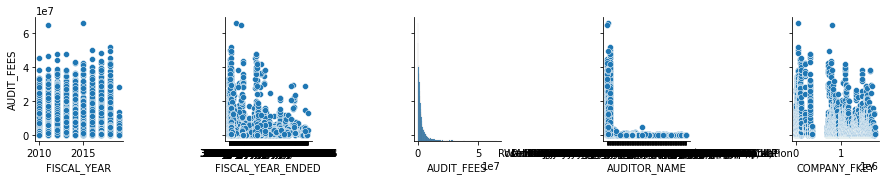

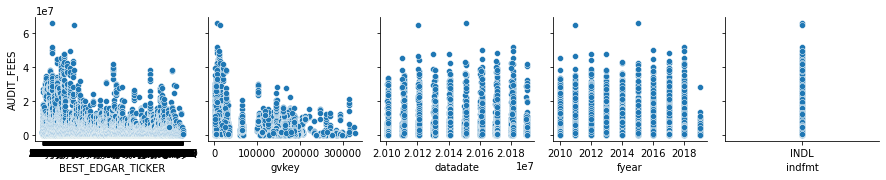

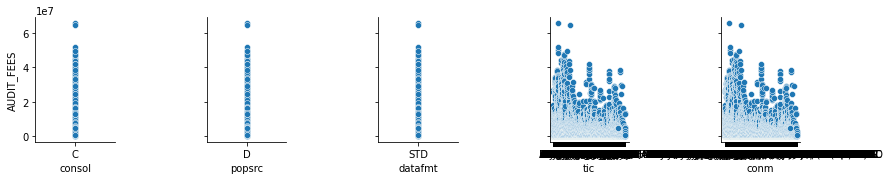

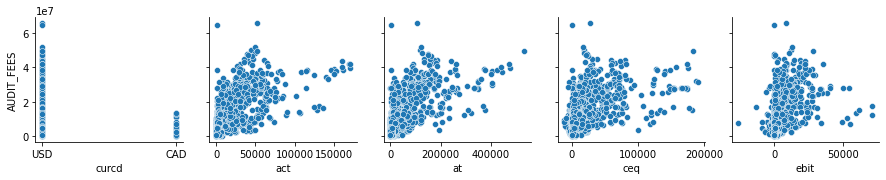

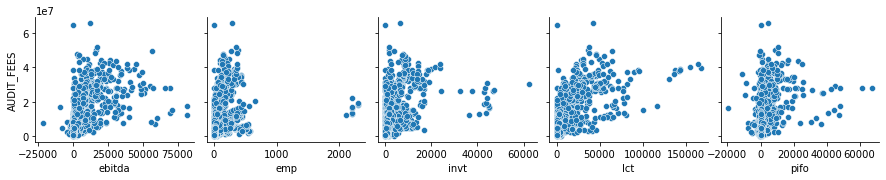

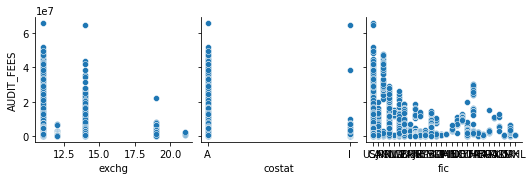

In [24]:
for i in range(0, len(df3.columns), 5):
    sns.pairplot(data=df3,
                x_vars=df3.columns[i:i+5],
                y_vars=['AUDIT_FEES'])
plt.show()

By looking at the pair plots or correlation plots we can see that only the variables"at", "act", "lct", "ebitda", "ceq", "ebit" and "invt", which we found earlier that were strongly correlated  to "AUDIT_FEES" have a linear or upward pattern of data points rest of the plots do not show linear pattern scatter plots. 

In [25]:
final_list = golden_features_list.index.tolist()
final_list.append('AUDIT_FEES')
final_list

['AUDIT_FEES',
 'at',
 'act',
 'lct',
 'ebitda',
 'ceq',
 'ebit',
 'invt',
 'AUDIT_FEES']

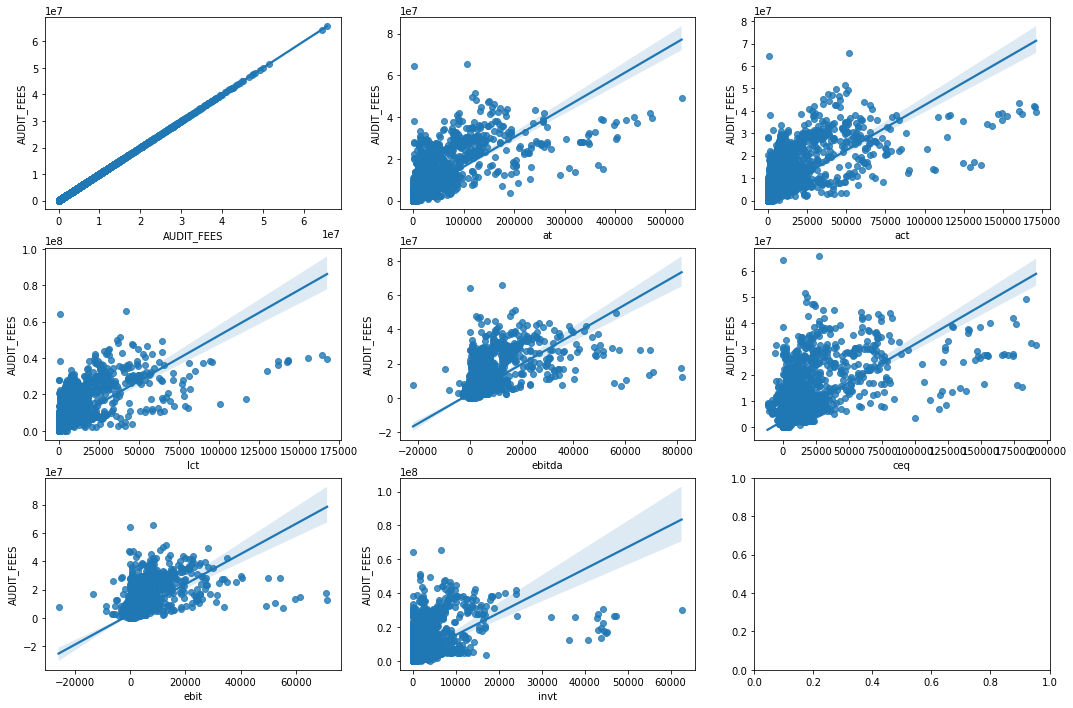

In [26]:
fig, ax = plt.subplots(round(len(final_list) / 3), 3, 
                       figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(final_list) - 1:
        sns.regplot(x=final_list[i],y='AUDIT_FEES', 
                    data=df3, ax=ax)
plt.show()

### Regression Model 1

In [27]:
result = sm.ols(formula="AUDIT_FEES ~ at + act + lct + ebitda + ceq + ebit + invt", 
                data=df3).fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AUDIT_FEES   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     2931.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:08:00   Log-Likelihood:            -2.3131e+05
No. Observations:               14097   AIC:                         4.626e+05
Df Residuals:                   14089   BIC:                         4.627e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.94e+06   2.88e+04     67.438      0.000    1.88e+06       2e+06
at           238.4731      6.225     38.307      0.000     226.271     250.676
act          252.2687      9.321     27.065      0.000     233.999     270.538
lct         -341.1941     14.871    -22.943      0.000    -370.344    -312.045
ebitda      -620.4037     62.983     -9.850      0.000    -743.860    -496.948
ceq         -185.9531      7.422    -25.055      0.000    -200.501    -171.406
ebit         480.9635     62.594      7.684      0.000     358.271     603.656
invt         394.9918     18.520     21.328      0.000     358.690     431.293
==============================================================================
Omnibus:                     9480.639   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           634713.616
Skew:                           2.532   Prob(JB):                         0.00
Kurtosis:                      35.480   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the linear regression model I decided to use only the strongly correlated values with "AUDIT_FEES" "at", "act", "lct", "ebitda", "ceq", "ebit" and "invt". Looking at the results we can clealry see that all the indpendepnt variable are significnat as the p value is very small (0.000) < 0.05. The adj r-square value is 0.593 or 59.3% which means the predictor variables can explain 59.3% variance in the audit fees. 4 variables i.e. "at"(total assets), "act" (current assets), "ebit" (earning before interest & tax) and "invt" (inventory) have a positive correlation with "AUDIT FEES" i.e. statsically speaking one unit increase in these variable the "AUDIT FEES" will increase by 238.47, 252.268 , 480.96 and 394.99 units respectively. This seems logical as the larger corporation the larger the assets, ebit and inventory which can take longer time to conduct auditing thereby charged premium "AUDIT FEES" by auditing companies. The variables like "lct"/ current liablities or things associated with cost of debt, "ceq" common equity & "ebitda" have negative relation with audit fees becuase this has to deal with some additional factors like size of the firm & risk associated in auditing those and whether the firms have to do voluntary or madatory audits. Audit fees increases when bigger firms have ask to deal with tax complexations or even try to project healthy financial when there is not or to gain a indepth insight of financial well being and pass it on to share holders. As in our datasets the omapnies were all publicly traded companies and are assumed to follow all IRS protocls in full & fair disclousres of ebdita, ceq and lct in thier financial reports for internal & external stakeholders its sort of reduces the auditing risks and also makes easier for auditing compnaies to do thier job quicker thereby reduces the audit fees.  

### OLS Reg Model 2 Improving Performance

In [29]:
df3['ceq2'] = df3['ceq']**2 
df3['ebit2'] = df3['ebit']**2
df3['invt2'] = df3['invt']**2
df3['at2'] = df3['at']**2
df3['act2'] = df3['act']**2

In [30]:
result2 = sm.ols(formula="AUDIT_FEES ~ at + act + lct + ebitda + ceq + act2 + ebit + ebit2 + at2 + invt ", 
                data=df3).fit()

In [31]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AUDIT_FEES   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3332.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:08:08   Log-Likelihood:            -2.2909e+05
No. Observations:               14097   AIC:                         4.582e+05
Df Residuals:                   14086   BIC:                         4.583e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.494e+06   2.54e+04     58.857      0.000    1.44e+06    1.54e+06
at           238.3889      6.074     39.245      0.000     226.482     250.296
act          281.1147     13.543     20.757      0.000     254.568     307.661
lct           10.6106     13.864      0.765      0.444     -16.564      37.785
ebitda      -531.0991     54.223     -9.795      0.000    -637.383    -424.815
ceq         -102.3493      6.472    -15.813      0.000    -115.036     -89.663
act2          -0.0017   8.03e-05    -21.781      0.000      -0.002      -0.002
ebit         640.1435     56.292     11.372      0.000     529.805     750.482
ebit2         -0.0094      0.000    -20.249      0.000      -0.010      -0.009
at2           -0.0003   1.03e-05    -24.573      0.000      -0.000      -0.000
invt         -85.3905     17.274     -4.943      0.000    -119.249     -51.532
==============================================================================
Omnibus:                     9546.865   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           913151.692
Skew:                           2.448   Prob(JB):                         0.00
Kurtosis:                      42.124   Cond. No.                     8.28e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Model 2 interpretation & Summary</b>: In the above mentioned model 2 focus on improving the model 1 to examine whether ceq, invt and ebdita have an exponential (non-linear) effect - by  squaring these terms. We can clearly see there is a change in the explannatory power by increasing the adj r square to 70.3%. In the new model lct or current liablity seems to insignificnat variable as the p-value > 0.05 and this kind off goes along with my secondary research on the relationship between lct & audit fees not having any direct relationship. To summerize we can clearly say that the larger the company, more complex the auditing procedure which requires allocation of more time & effort by the auditing companies and thereby charge higher prices. 
